# NoisET example: detection of responding clones

In this notebook, we want to show examples to help the user to learn how NoisET works in practise when using its second function (ie detection of responding clones following a stimulus). The output is the <strong>list </strong> of  <strong> responding clones </strong>.
Prior starting this task, experimental noise parameters should be learnt thanks to first function of <em> NoisET </em>. Picked noise model and two sets of experimental noise parameters learnt at both times are required as inputs to the second function. 

In this notebook, we give an examplue using data from [Precise tracking of vaccine-responding T cell clones reveals convergent and personalized response in identical twins, Pogorelyy et al, PNAS](https://www.pnas.org/content/115/50/12704)
As peak response is supposed to be 15 days after the Yellow Fever vaccine injection, we spot here thanks to <em> NoisET </em> the expanded clones from day 0 to day 15 for individual $S_1$.

In [1]:
import numpy as np
import noisets
import sys
sys.path.append('../NoisET/noisets')
import noisettes as ns

import matplotlib.pyplot as plt

### Import data 

- Create an object that will be associate to a particular patient, for two dates of interest. In this notebook, we are focused on the expansion.

In [2]:
# Load data 
path = 'data_examples/'
filename1 = 'Q1_0_F1_.txt.gz' # first biological replicate
filename2 = 'Q1_15_F1_.txt.gz' # second biological replicate
col_names = ['Clone count', 'Clone count']
id_names = ['N. Seq. CDR3', 'N. Seq. CDR3']

# check 
cl_Q1 = ns.Data_Process(path, filename1, filename2, id_names, col_names)
print("First Filename is : " , cl_Q1.filename1)
print("Second Filename is : ",  cl_Q1.filename2)

# Import the data
df = cl_Q1.import_data()
fractions1, fractions2 = df['counts1']/df['counts1'].sum(), df['counts2']/df['counts2'].sum()

First Filename is :  Q1_0_F1_.txt.gz
Second Filename is :  Q1_15_F1_.txt.gz


- Visualization of the data

Text(0.5,1,'$ mRNA \\ data \\ Q_1 $')

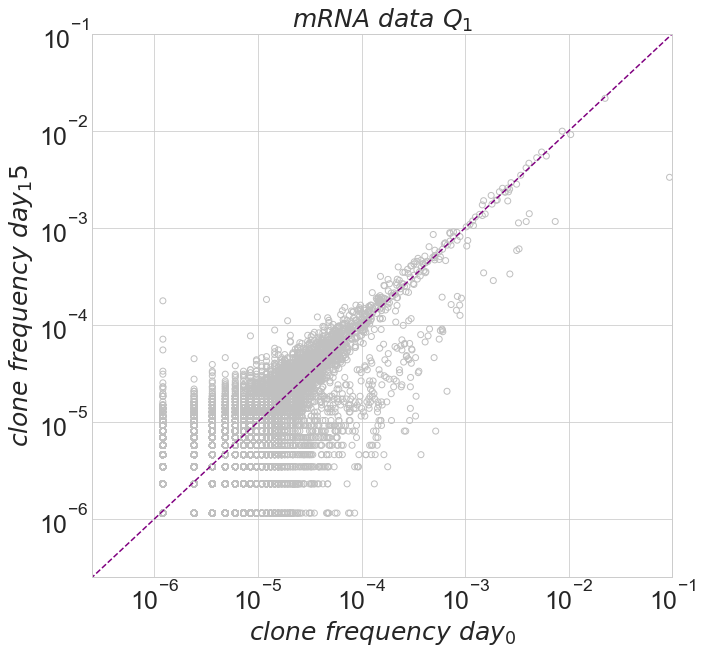

In [3]:
plt.figure(figsize=(10.4,10))
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-whitegrid')
plt.scatter(fractions1, fractions2, c='none', edgecolor='silver')
plt.plot(X,X, linestyle ='--', color ='purple')
plt.xlabel(r'$clone \ frequency \ day_0 $', fontsize = 25)
plt.ylabel(r'$clone \ frequency \ day_15 $', fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])

plt.title(r'$ mRNA \ data \ Q_1 $', fontsize = 25)

## Expansion 

In [4]:
#parameters for the noise model for time_1 Q1
paras_1 = [-2.05458585,   0.44229634,   1.09391748, -10.19919861] 
#parameters for the noise model for time_2 Q2
paras_2 =  [-2.05458585,   0.44229634,   1.09391748, -10.19919861] 

noise_model = 1 # Negative Binomial Sampling Noise Model

In [5]:
expansion = ns.Expansion_Model(df)

# 2 thresholds to set for the detection
pval_threshold = 0.05 
smed_threshold = 0 

#outpath = 'testexpansion_Q1_0_15' # name of the file

table = expansion.expansion_table(paras_1, paras_2, noise_model, pval_threshold, smed_threshold)

../NoisET/noisets/utils.py:113: RuntimeWarning: divide by zero encountered in true_divide
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
../NoisET/noisets/utils.py:113: RuntimeWarning: invalid value encountered in log
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
../NoisET/noisets/utils.py:214: RuntimeWarning: divide by zero encountered in log
  return np.log(Pn_f)


N_obs: 829423
Calculation Surface : 

--- 273.3508930206299 seconds ---


../NoisET/noisets/noisettes.py:679: RuntimeWarning: invalid value encountered in true_divide
  Ps_n1n2ps=Pn1n2_s*Ps[:,np.newaxis,np.newaxis]/Pn1n2_ps[np.newaxis,:,:]


In [6]:
table[:10]

,"$s_{1,low}$","$s_{2,med}$","$s_{3,high}$",$s_{max}$,$\bar{s}$,id,counts1,counts2,$1-P(s>0)$
53,6.267763,9.107842,15.473539,8.128505,9.633633,TGTGCCAGCAGCCAAGATTGGGGAGAGACCCAGTACTTC,0.0,1480.0,1.506793e-274
54,5.876027,8.716107,15.081804,7.638836,9.196588,TGTGCCAGCAGCTCCGGGACAGGGGCATACGAGCAGTACTTC,0.0,957.0,9.703965e-180
55,5.582226,8.422306,14.788002,7.345034,8.905274,TGTGCCAGCAGCGGGACAGTGTACGAGCAGTACTTC,0.0,716.0,1.629488e-135
56,5.386358,8.226438,14.592135,7.149167,8.717524,TGTGCCAGCAGTGGGACAGTCTACGAGCAGTACTTC,0.0,594.0,5.945497e-113
57,5.386358,8.226438,14.592135,7.149167,8.710731,TGTGCCGTTGCCGGGACAGTCTACGAGCAGTACTTC,0.0,590.0,3.282876e-112
58,5.092557,8.030571,14.298333,6.953299,8.481929,TGCAGTGCTAGCGGGGGCCGGGGTTCAGATACGCAGTATTTT,0.0,470.0,7.183397e-90
59,4.994623,7.834703,14.200399,6.757431,8.344344,TGTGCCAGCAGTTATAGGGTCTCTGGGGCCAACGTCCTGACTTTC,0.0,410.0,1.229383e-78
60,4.896689,7.834703,14.102466,6.757431,8.293931,TGCAGCGCTGACCCGGGGATGAACACTGAAGCTTTCTTT,0.0,390.0,6.995493e-75
61,4.896689,7.736769,14.102466,6.659498,8.227115,TGTGCCAGCACCGGGACAGTCTACGAGCAGTACTTC,0.0,365.0,3.522419e-70
62,4.896689,7.736769,14.102466,6.659498,8.207578,TGCAGCGTTGTGCCTAGCGGGAGTCCAAATGAGCAGTTCTTC,0.0,358.0,7.329746e-69


Detected clones are stressed in purple.

[2.5e-07, 0.1, 2.5e-07, 0.1]

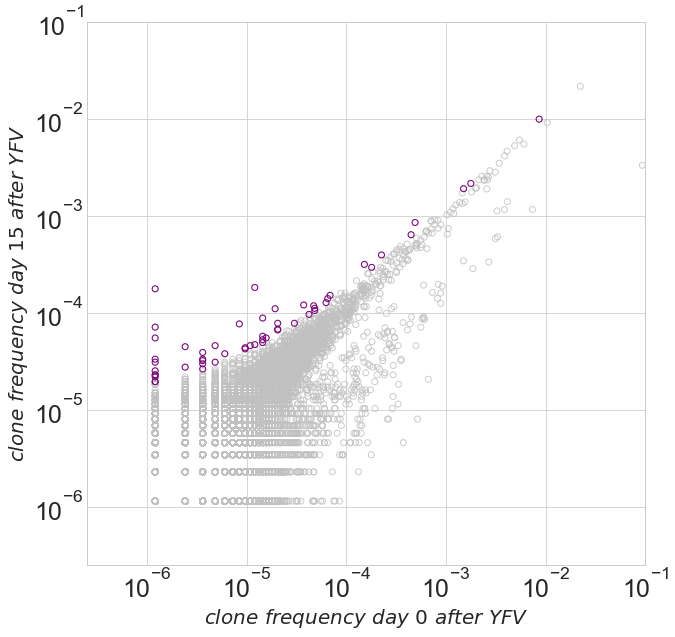

In [7]:
plt.figure(figsize=(10,10))

plt.style.use('seaborn-whitegrid')
plt.scatter(fractions1, fractions2, c='none', alpha = 0.8, edgecolor='silver')
plt.scatter(table['counts1']/df['counts1'].sum(), table['counts2']/df['counts2'].sum(), c='none', edgecolor='purple')

plt.xlabel(r'$clone \ frequency \ day \ 0 \ after \ YFV $', fontsize=20)
plt.ylabel(r'$clone \ frequency \ day \ 15 \ after \ YFV $', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])